In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\Noor\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(150, activation=tf.nn.relu),#128
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [6]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [2]:
model.fit(train_images, train_labels, epochs=5 )

NameError: name 'model' is not defined

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 1s 52us/step
Test accuracy: 0.8613


In [9]:
predictions = model.predict(test_images)

In [10]:
np.argmax(predictions[0])

9

In [11]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [12]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [13]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.0330964e-09 1.3030380e-11 2.8074017e-11 1.2994267e-11 8.2481749e-10
  1.3733465e-04 6.5394490e-09 1.3394326e-03 9.4246051e-09 9.9852318e-01]]


In [14]:
np.argmax(predictions_single[0])

9

In [15]:
from sklearn.metrics import classification_report
val_preds = np.argmax(predictions, axis=-1)
# y_pred = model.predict(x_test)
print(classification_report(test_labels, val_preds))
from sklearn.metrics import precision_recall_fscore_support
Precision, Recall, F1_Score, Average =precision_recall_fscore_support(test_labels, val_preds , average='macro')
print(F1_Score)

             precision    recall  f1-score   support

          0       0.76      0.90      0.83      1000
          1       0.97      0.97      0.97      1000
          2       0.71      0.85      0.77      1000
          3       0.91      0.87      0.89      1000
          4       0.78      0.80      0.79      1000
          5       0.98      0.94      0.96      1000
          6       0.81      0.49      0.61      1000
          7       0.96      0.82      0.89      1000
          8       0.96      0.98      0.97      1000
          9       0.83      0.99      0.90      1000

avg / total       0.87      0.86      0.86     10000

0.8574999077416884


In [16]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

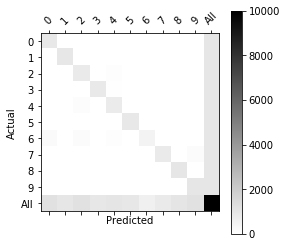

In [17]:
import pandas as pd 
df_confusion = pd.crosstab(test_labels, val_preds)
df_confusion = pd.crosstab(test_labels, val_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
plot_confusion_matrix(df_confusion)